### normalization (log transformation)

In [62]:
fl_cols = list(df_clean.columns[df_clean.dtypes=="float64"]) 
fl_cols

['altitude',
 'building_height_ft',
 'building_total_area_sqft',
 'building_year',
 'living_area_sqft',
 'lowe_floor_thermal_conductivity',
 'outer_wall_thermal_conductivity',
 'percentage_glazed_surfaced',
 'upper_floor_thermal_conductivity',
 'window_heat_retention_factor',
 'window_thermal_conductivity',
 'energy_consumption_per_annum']

In [63]:
X = df_clean.drop(["energy_consumption_per_annum"], axis=1)
y = df_clean["energy_consumption_per_annum"]

In [64]:
from sklearn.decomposition import PCA

# Instantiate the PCA object
pca = PCA(n_components=0.95)

# Fit PCA to the data
pca.fit(X)

# Transform the data
X_pca = pca.transform(X)

In [66]:
X_pca.shape

(1000731, 2)

In [67]:
X.shape

(1000731, 40)

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [70]:
pca = PCA().fit(X_scaled)

Text(0, 0.5, 'cumulative explained variance')

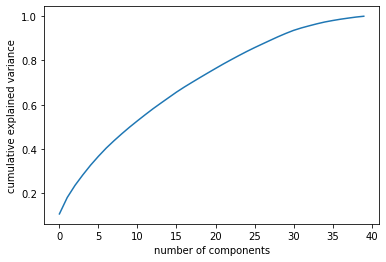

In [71]:
#need to know first how many components are required to explain at least 90% of features variation
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### random forest

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [73]:
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained variance:", explained_variance)

Explained variance: 0.6986635224992928


In [77]:
import xgboost as xgb


In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1500, max_depth=15, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained variance:", explained_variance)

DNN

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)